## About

In this notebook we prepare a simple solution for the [kaggle challenge on higgs.](https://inclass.kaggle.com/c/mlhep-2016-higgs-detection)

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import pandas
import numpy

from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

### Download data

In [3]:
!cd datasets; wget -O public_train_10000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_10000.root

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
File `public_train_10000.root' already there; not retrieving.


In [4]:
!cd datasets; wget -O public_train_100000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_100000.root

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
File `public_train_100000.root' already there; not retrieving.


In [5]:
# you can download training sample with 100000 available events
# uncomment the below row
# !cd datasets; wget -O public_train_100000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_100000.root

In [6]:
!cd datasets; wget -O public_test.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_test.root

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
File `public_test.root' already there; not retrieving.


### Read the smallest part of training file and test file

In [7]:
import root_numpy
data = pandas.DataFrame(root_numpy.root2array('datasets/public_train_10000.root'))
data1 = pandas.DataFrame(root_numpy.root2array('datasets/public_train_100000.root'))
test = pandas.DataFrame(root_numpy.root2array('datasets/public_test.root'))

In [8]:
data.head()
#data.shape
#data['lepton_pt']
#data['sum_pt'] = data['lepton_pt']+data['mem_pt']+data['jet1_pt']+data['jet2_pt']+data['jet3_pt']+data['jet4_pt']
#pt_features = list(filter(lambda feature: feature.endswith("_pt"), features.columns))
#print(pt_features)
#pandas.options.display.max_columns = 40
data.shape

#print data[1:3]
#print data1[1:3]

(10000, 30)

### Divide training data into 2 parts 
`train_test_split` function is used to divide into 2 parts to preserve quality overestimating.


In [9]:
test.head()

,event_id,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1,58.814354,-1.223199,1.290717,26.435696,2.608772,68.413330,0.639561,-1.226549,1.000008,...,-1.195189,1.767687,0.000000,72.190338,170.810608,78.644196,224.813538,95.737434,372.835388,469.654236
1,2,21.390781,-0.468277,-1.371404,57.185963,1.214130,118.127953,-0.113784,-2.182008,0.000000,...,0.965376,2.698023,1.000000,62.736309,215.426300,73.971413,211.729141,195.910385,310.480103,431.597137
2,3,58.570217,1.443092,0.105191,54.450954,-2.354347,26.443583,-1.911658,1.337635,0.000000,...,-2.212247,-2.609508,0.000000,48.172768,163.506821,106.111038,260.643646,351.328644,638.053040,790.960815
3,4,70.469345,0.166176,-1.962429,38.138966,2.564890,42.678413,-1.256608,-0.276156,2.000000,...,-0.007441,3.048725,2.000023,99.099815,158.532227,79.701500,169.550491,96.056900,305.073212,402.656067
4,5,113.456779,0.232503,2.941150,64.401146,1.125812,164.289139,-0.735258,-0.590741,1.999937,...,-0.943712,1.599526,2.000023,50.816051,200.099945,130.013855,187.637009,142.145920,433.032440,507.496399


### Define training features

Exclude `event_id`, `target` from the features set

In [10]:
All_features = list(set(data.columns) - {'event_id', 'target'})
#features = list(set(data.columns))
#features = data.columns
All_features

['jet3_pt',
 'jet3_eta',
 'm_jjj',
 'mem_phi',
 'jet1_pt',
 'jet4_phi',
 'jet1_phi',
 'jet2_eta',
 'jet3_btag',
 'm_jlv',
 'm_wbb',
 'jet4_pt',
 'jet4_btag',
 'jet2_pt',
 'jet1_btag',
 'm_jj',
 'm_wwbb',
 'jet2_phi',
 'lepton_phi',
 'm_bb',
 'm_lv',
 'jet4_eta',
 'jet2_btag',
 'lepton_pt',
 'mem_pt',
 'lepton_eta',
 'jet3_phi',
 'jet1_eta']

### Prepare high-level features for training

In [11]:
high_level_features = ['m_jj', 'm_jjj', 'm_jlv', 'm_wwbb', 'm_bb', 'm_wbb', 'm_lv']


## Prepare lowh-level features for training


In [12]:
low_level_features =list(set(All_features) - set(high_level_features))
low_level_features

['jet3_pt',
 'jet3_eta',
 'jet4_eta',
 'jet2_btag',
 'jet1_btag',
 'jet4_btag',
 'lepton_pt',
 'jet3_btag',
 'jet2_pt',
 'mem_phi',
 'lepton_eta',
 'jet1_pt',
 'jet3_phi',
 'jet2_phi',
 'jet4_phi',
 'lepton_phi',
 'jet1_eta',
 'mem_pt',
 'jet2_eta',
 'jet4_pt',
 'jet1_phi']

# High Level Features Construction

## pt pair

In [13]:
target = data.target
#features = data.drop("target", axis=1).astype(numpy.float64)
#features = data.astype(numpy.float64)
pt_features = list(filter(lambda data: data.endswith("_pt"), data.columns))
pt_features

['lepton_pt', 'mem_pt', 'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt']

In [36]:

# pt pairs
from itertools import product
pt_pairs = frozenset(filter(lambda pair:len(pair) == 2, map(frozenset, product(pt_features, pt_features))))
print pt_pairs
data_pair_features = []
pair_names = []
for pt_pair in pt_pairs:
    m1, m2 = pt_pair
    data_pair_features.append(data[m1] + data[m2])
    pair_names.append("%s+%s" % (m1, m2))
data_pair_features = pandas.concat( data_pair_features, axis=1)
pandas.options.display.max_columns = 60
#pt_pair_features
data_pair_features.columns = pair_names
#data_pair_features
data[pair_names] = data_pair_features
pair_features = pair_names
print pair_features
#data['sum_pt'] = data['lepton_pt']+data['mem_pt']+data['jet1_pt']+data['jet2_pt']+data['jet3_pt']+data['jet4_pt']
data.head()
data.shape

frozenset([frozenset(['lepton_pt', 'jet1_pt']), frozenset(['jet3_pt', 'mem_pt']), frozenset(['jet2_pt', 'jet1_pt']), frozenset(['jet4_pt', 'jet1_pt']), frozenset(['lepton_pt', 'mem_pt']), frozenset(['lepton_pt', 'jet4_pt']), frozenset(['jet2_pt', 'jet4_pt']), frozenset(['jet2_pt', 'mem_pt']), frozenset(['jet3_pt', 'jet4_pt']), frozenset(['mem_pt', 'jet1_pt']), frozenset(['jet3_pt', 'jet2_pt']), frozenset(['lepton_pt', 'jet3_pt']), frozenset(['jet3_pt', 'jet1_pt']), frozenset(['lepton_pt', 'jet2_pt']), frozenset(['mem_pt', 'jet4_pt'])])
['lepton_pt+jet1_pt', 'jet3_pt+mem_pt', 'jet2_pt+jet1_pt', 'jet4_pt+jet1_pt', 'lepton_pt+mem_pt', 'lepton_pt+jet4_pt', 'jet2_pt+jet4_pt', 'jet2_pt+mem_pt', 'jet3_pt+jet4_pt', 'mem_pt+jet1_pt', 'jet3_pt+jet2_pt', 'lepton_pt+jet3_pt', 'jet3_pt+jet1_pt', 'lepton_pt+jet2_pt', 'mem_pt+jet4_pt']


(10000, 46)

In [16]:

for pt_feature in pt_features:
    data['sum_pt'] += data[pt_feature]
high_level_features = high_level_features + ['sum_pt']
high_level_features

['m_jj', 'm_jjj', 'm_jlv', 'm_wwbb', 'm_bb', 'm_wbb', 'm_lv', 'sum_pt']

## bjets selection 

In [47]:
def second_largest(numbers):
    count = 0
    m1 = m2 = float('-inf')
    for x in numbers:
        count += 1
        if x > m2:
            if x >= m1:
                m1, m2 = x, m1            
            else:
                m2 = x
    return m2 if count >= 2 else None

def delta_R(eta1,eta2,phi1,phi2):
    return numpy.sqrt((eta1-eta2)**2+(phi1-phi2)**2)

btag_features = list(filter(lambda data: data.endswith("_btag"), data.columns))
#pt_features   = list(filter(lambda data: data.endswith("_pt"), data.columns))
#print(btag_features)
data_btags = data[btag_features]
numpy_btags = numpy.array(btag_features)
#print data_btags[0:10]
#print data[0:10]
del_pts_bb = []
del_phis_bb = []
del_Rs_bb = []
for index, row in data_btags.iterrows():
    max1_index = list(row).index(row.max())
    max2_index = list(row).index(second_largest(row))
    jet_label_1 = 'jet{}_'.format(max1_index+1)
    jet_label_2 = 'jet{}_'.format(max2_index+1)
    jet_max1_pt = data.iloc[index]['{}pt'.format(jet_label_1)]
    jet_max2_pt = data.iloc[index]['{}pt'.format(jet_label_2)]
    jet_max1_eta = data.iloc[index]['{}eta'.format(jet_label_1)]
    jet_max2_eta = data.iloc[index]['{}eta'.format(jet_label_2)]
    jet_max1_phi = data.iloc[index]['{}phi'.format(jet_label_1)]
    jet_max2_phi = data.iloc[index]['{}phi'.format(jet_label_2)]
    del_pt_bb  = numpy.abs(jet_max1_pt - jet_max2_pt)
    del_phi_bb = numpy.abs(jet_max1_phi - jet_max2_phi)
    del_R_bb   = delta_R(jet_max1_eta,jet_max2_eta,jet_max1_phi,jet_max2_phi)
    del_pts_bb.append(del_pt_bb)
    del_phis_bb.append(del_phi_bb)
    del_Rs_bb.append(del_R_bb)
    if index < 11:
        print   jet_label_1, jet_label_2, jet_max1_pt, jet_max2_pt, jet_max1_phi, jet_max2_phi, del_pt_bb, del_R_bb, del_phi_bb

#print np.array(del_pts_bb).shape
data['del_pt_bb']=numpy.array(del_pts_bb)
data['del_phi_bb']=numpy.array(del_phis_bb)
data['del_R_bb']=numpy.array(del_Rs_bb)
bjets_selection_fecture = ['del_pt_bb', 'del_phi_bb', 'del_R_bb']
data.head()

jet1_ jet3_ 44.8141479492 71.9542007446 2.6315946579 -2.85851311684 27.1400527954 5.64712613824 5.49010777473
jet2_ jet4_ 52.2215194702 71.6814041138 -0.2527769804 -1.30032455921 19.4598846436 1.04850635706 1.04754757881
jet4_ jet3_ 113.246665955 40.954044342 -1.60555028915 2.12314915657 72.2926216125 3.74514046246 3.72869944572
jet4_ jet1_ 30.7412815094 84.3074264526 -2.25624585152 2.28778290749 53.5661449432 4.66431851934 4.544028759
jet2_ jet1_ 46.2831840515 32.8521118164 -2.52435731888 2.64145970345 13.4310722351 6.5641037708 5.16581702232
jet2_ jet1_ 123.111198425 60.5257568359 -1.06128799915 -2.32009148598 62.5854415894 1.39128967201 1.25880348682
jet4_ jet2_ 61.1130256653 55.1097373962 1.51979720592 3.00320196152 6.00328826904 2.40389029151 1.48340475559
jet1_ jet2_ 90.8235092163 92.7540588379 -2.22294187546 -0.643557906151 1.93054962158 1.59418643457 1.57938396931
jet2_ jet3_ 53.3835258484 120.977127075 -2.36604833603 -1.35913515091 67.5936012268 1.21554061213 1.00691318512
jet

,event_id,target,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,jet2_pt,jet2_eta,jet2_phi,jet2_btag,jet3_pt,jet3_eta,jet3_phi,jet3_btag,jet4_pt,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,lepton_pt+jet1_pt,jet3_pt+mem_pt,jet2_pt+jet1_pt,jet4_pt+jet1_pt,lepton_pt+mem_pt,lepton_pt+jet4_pt,jet2_pt+jet4_pt,jet2_pt+mem_pt,jet3_pt+jet4_pt,mem_pt+jet1_pt,jet3_pt+jet2_pt,lepton_pt+jet3_pt,jet3_pt+jet1_pt,lepton_pt+jet2_pt,mem_pt+jet4_pt,sum_pt,del_pt_bb,del_phi_bb,del_R_bb
0,1000001,1,34.750568,0.787025,1.898891,20.862434,-2.622998,44.814148,-0.168171,2.631595,2.000023,57.689522,-0.161628,-0.682047,0.000000,71.954201,1.154233,-2.858513,2.000016,79.948036,0.877472,-0.256736,0.000000,81.724449,189.583145,80.118317,170.086075,91.128204,298.468781,374.685760,79.564713,92.816635,102.503670,124.762184,55.613003,114.698608,137.637558,78.551956,151.902237,65.676582,129.643723,106.704773,116.768349,92.440094,100.810471,620.037842,27.140053,5.490108,5.647126
1,1000002,1,54.250927,-1.057915,2.310697,51.167873,2.545749,31.039040,-2.220276,-0.737298,0.000000,52.221519,-1.094289,-0.252777,2.000023,42.725616,1.474829,2.906143,0.000000,71.681404,-1.139118,-1.300325,2.000016,65.837746,201.096756,83.321556,208.039688,67.118484,287.363983,527.247559,85.289963,93.893494,83.260559,102.720444,105.418800,125.932327,123.902924,103.389389,114.407021,82.206909,94.947136,96.976547,73.764656,106.472443,122.849274,606.172729,19.459885,1.047548,1.048506
2,1000003,1,47.746025,-0.783184,2.660325,68.165527,-1.700790,36.945312,-1.151738,-0.626912,0.000000,118.880913,-0.211263,1.326902,0.000000,40.954044,-1.149437,2.123149,1.000011,113.246666,-0.798898,-1.605550,2.000016,69.316925,156.334732,95.307602,149.089005,130.389206,237.879318,336.058838,84.691338,109.119568,155.826233,150.191986,115.911552,160.992691,232.127579,187.046448,154.200714,105.110840,159.834961,88.700073,77.899353,166.626938,181.412201,851.877014,72.292622,3.728699,3.745140
3,1000004,0,45.950066,1.613817,0.964722,39.302082,-0.075989,84.307426,0.465748,2.287783,2.000016,46.788040,0.441073,-1.303352,0.000000,15.260404,2.409047,-0.850500,0.000000,30.741282,-0.586711,-2.256246,2.000023,71.032066,182.341537,81.941925,164.411148,93.709511,237.900055,392.807831,130.257492,54.562485,131.095459,115.048706,85.252151,76.691345,77.529320,86.090118,46.001686,123.609512,62.048443,61.210468,99.567833,92.738106,70.043365,524.698669,53.566145,4.544029,4.664319
4,1000005,0,44.409187,-0.228907,-1.837974,49.886654,0.156533,32.852112,2.561646,2.641460,0.000000,46.283184,-1.488267,-2.524357,2.000000,29.664640,-0.031725,-1.192486,0.000000,138.741928,0.293522,1.391425,0.000000,122.030174,288.594086,84.386459,150.299744,69.818291,435.990356,533.977905,77.261299,79.551292,79.135300,171.594040,94.295837,183.151123,185.025116,96.169838,168.406570,82.738770,75.947823,74.073830,62.516754,90.692368,188.628586,683.675415,13.431072,5.165817,6.564104


# Plot Constracted Features

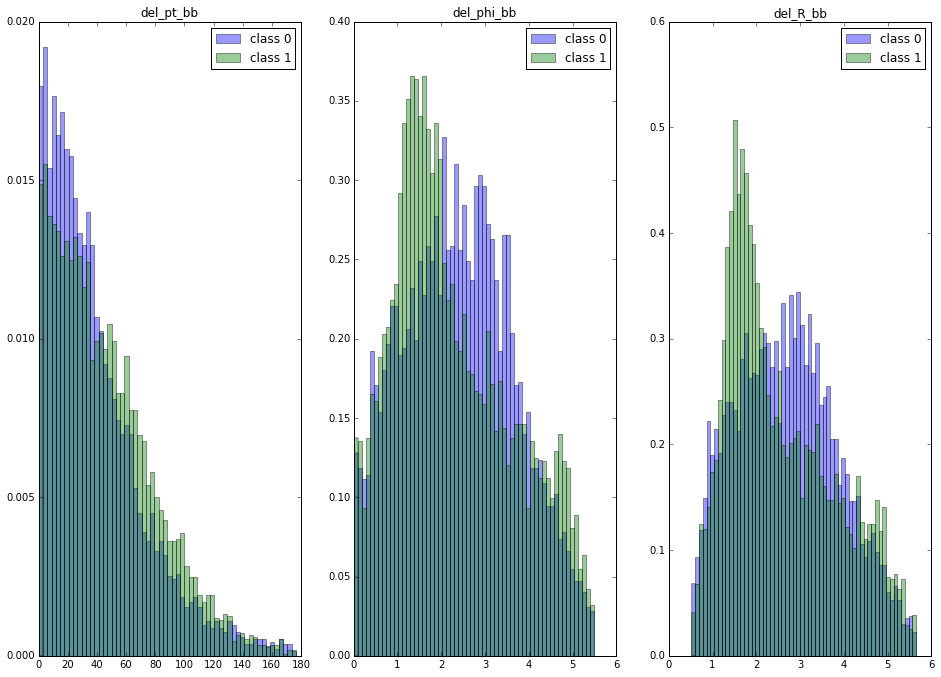

In [41]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}

# create the figure
plt.figure(figsize=(16, 25))
for n, feature in enumerate(bjets_selection_fecture):
    # add sub plot on our figure
    plt.subplot(len(bjets_selection_fecture) // 3 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    #plt.legend()
    plt.title(feature)

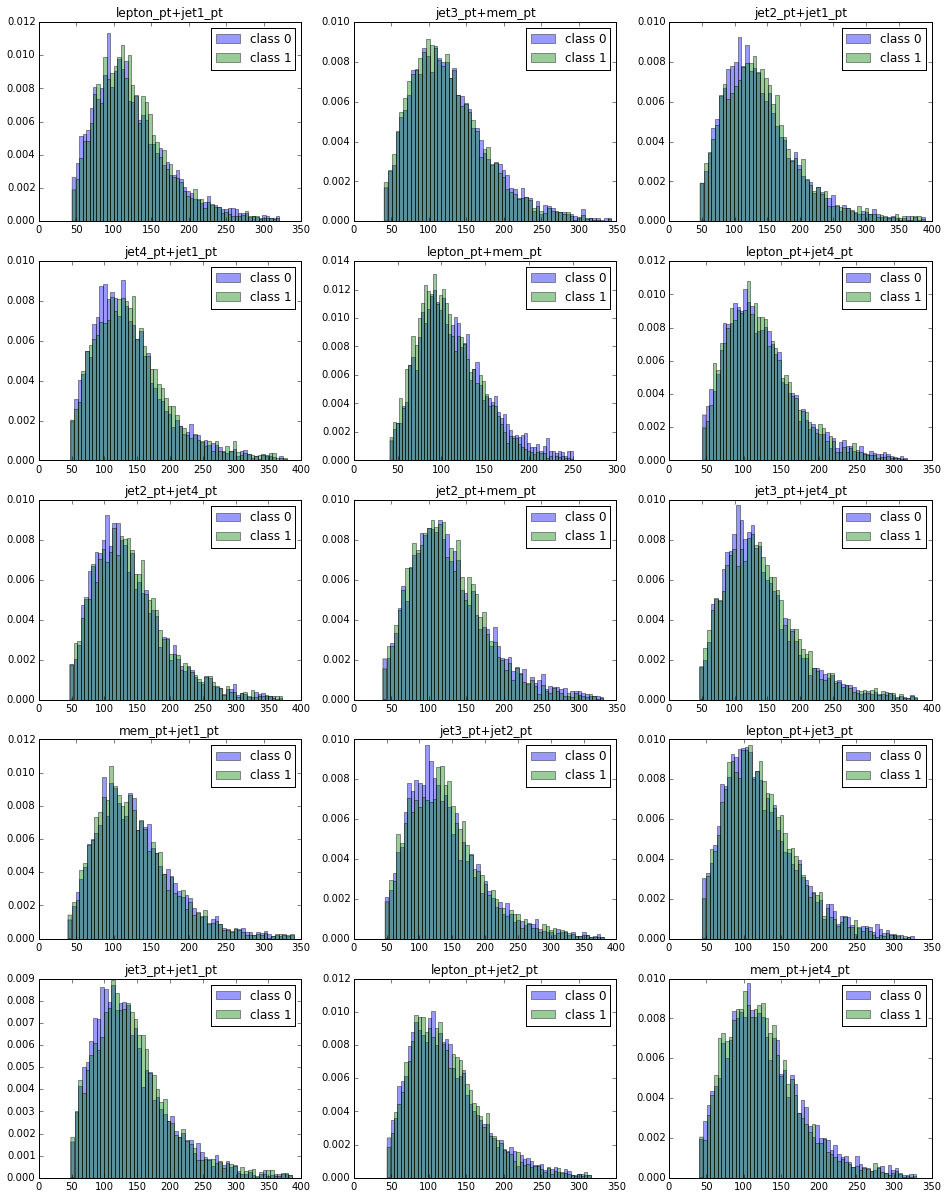

In [17]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}

# create the figure
plt.figure(figsize=(16, 25))
for n, feature in enumerate(pair_features):
    # add sub plot on our figure
    plt.subplot(len(pair_features) // 3 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    #plt.legend()
    plt.title(feature)

### Plot histograms for each low-level feature

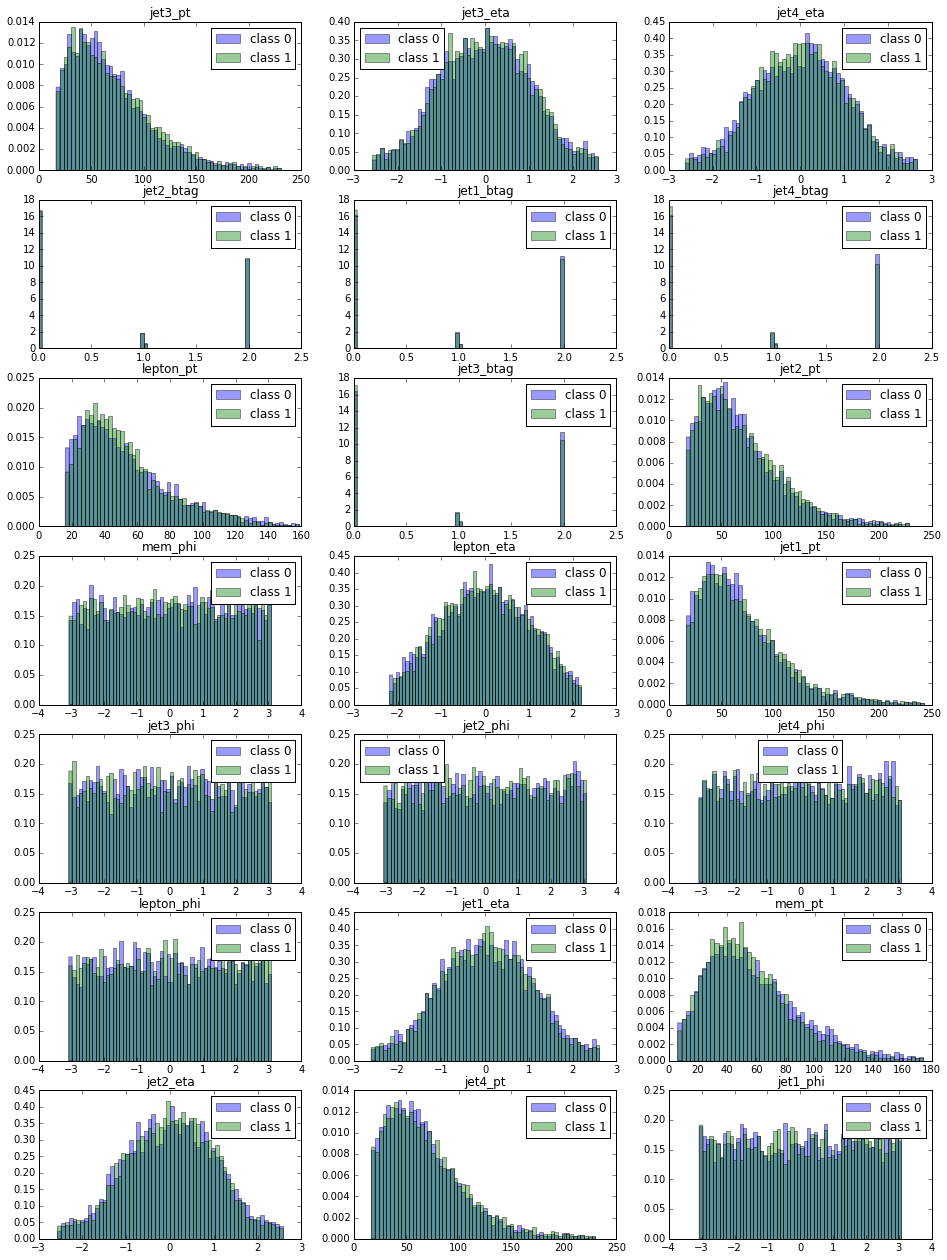

In [194]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
# create the figure
plt.figure(figsize=(16, 25))
for n, feature in enumerate(low_level_features):
    # add sub plot on our figure
    plt.subplot(len(low_level_features) // 3 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    #plt.legend()
    plt.title(feature)

### Plot histograms for each high-level feature

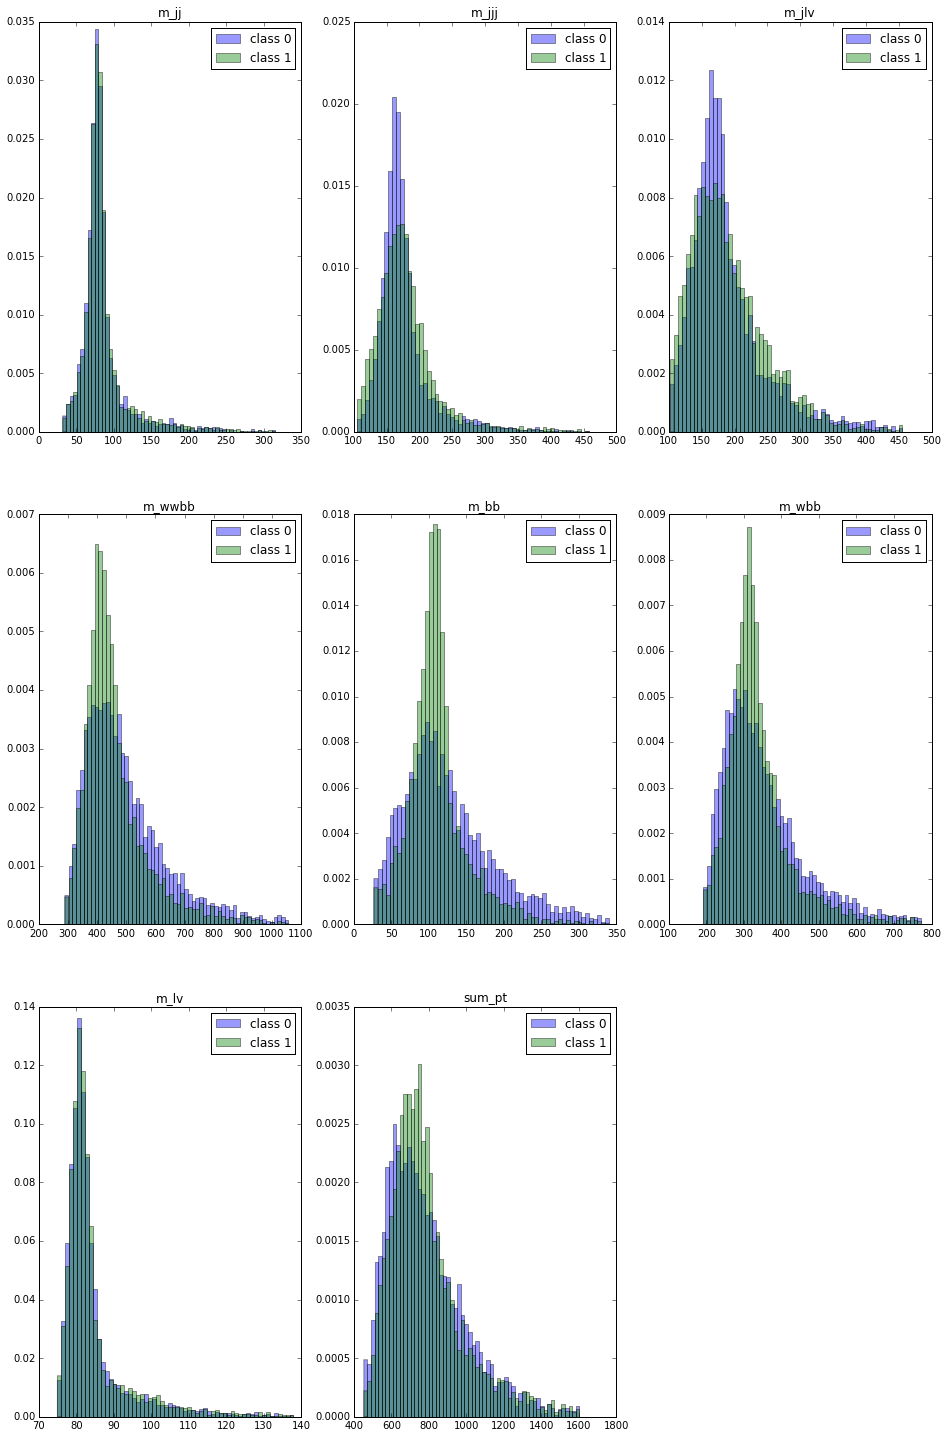

In [18]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
# create the figure
plt.figure(figsize=(16, 25))
for n, feature in enumerate(high_level_features):
    # add sub plot on our figure
    plt.subplot(len(high_level_features) // 3 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    #plt.legend()
    plt.title(feature)

### Divide training data into 2 parts 
`train_test_split` function is used to divide into 2 parts to preserve quality overestimating.


In [48]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.66)
training_data

,event_id,target,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,jet2_pt,jet2_eta,jet2_phi,jet2_btag,jet3_pt,jet3_eta,jet3_phi,jet3_btag,jet4_pt,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,lepton_pt+jet1_pt,jet3_pt+mem_pt,jet2_pt+jet1_pt,jet4_pt+jet1_pt,lepton_pt+mem_pt,lepton_pt+jet4_pt,jet2_pt+jet4_pt,jet2_pt+mem_pt,jet3_pt+jet4_pt,mem_pt+jet1_pt,jet3_pt+jet2_pt,lepton_pt+jet3_pt,jet3_pt+jet1_pt,lepton_pt+jet2_pt,mem_pt+jet4_pt,sum_pt,del_pt_bb,del_phi_bb,del_R_bb
2812,1002813,1,36.558056,0.871073,-1.875971,32.348896,1.886075,50.476814,-0.328901,-1.075737,2.000023,64.617294,-0.450971,2.931477,0.000000,32.926807,0.911784,-2.382645,0.000000,122.595406,-0.360457,0.250861,1.999937,82.108032,149.554794,78.179947,191.766632,100.826942,295.370422,371.348267,87.034866,65.275703,115.094109,173.072220,68.906952,159.153458,187.212708,96.966187,155.522217,82.825714,97.544098,69.484863,83.403625,101.175354,154.944305,679.046570,72.118591,1.326598,1.326974
1156,1001157,1,40.877480,1.773539,0.394272,119.687973,-0.826727,79.261192,0.896603,2.101840,2.000023,55.464989,1.030204,-1.194690,0.000000,31.453140,-0.135306,1.915169,0.000000,100.407585,0.063724,-3.001023,1.999937,91.227737,169.929443,78.836151,379.992676,122.491302,508.695221,600.531738,120.138672,151.141113,134.726181,179.668777,160.565460,141.285065,155.872574,175.152954,131.860718,198.949158,86.918129,72.330620,110.714333,96.342468,220.095551,854.304688,21.146393,5.102863,5.170387
3765,1003766,1,60.793270,-0.064583,-0.443597,62.141426,-2.104641,89.001709,0.435776,2.332960,2.000023,40.701923,0.790639,-2.282197,0.000000,34.461823,0.208259,0.519108,0.000000,34.415470,-1.543717,-1.274848,0.000000,76.882690,150.232452,82.999741,204.561447,95.572144,296.006134,384.221008,149.794983,96.603249,129.703629,123.417175,122.934692,95.208740,75.117393,102.843353,68.877289,151.143127,75.163742,95.255096,123.463531,101.495193,96.556900,643.031189,48.299786,4.615157,4.628780
2786,1002787,0,30.071493,1.344375,-2.900974,87.690002,2.482121,19.990946,-2.649887,0.452615,0.000000,46.983448,-1.370212,0.028341,2.000000,26.962893,0.774883,2.361298,0.000000,63.778763,-0.150193,-1.181017,0.000000,84.463135,173.293961,79.058395,199.897705,41.805847,305.281158,390.786407,50.062439,114.652893,66.974396,83.769707,117.761497,93.850258,110.762207,134.673447,90.741653,107.680946,73.946342,57.034386,46.953838,77.054939,151.468765,550.955078,26.992502,0.424274,1.348175
4714,1004715,1,51.561310,0.965479,0.348602,52.809505,-2.543659,88.887527,1.167505,-1.901857,1.999937,64.737076,-0.052647,1.798956,0.000000,68.310822,0.634957,3.005993,2.000023,46.625492,1.032965,-1.016961,0.000000,106.968735,208.579285,102.133255,176.649948,107.349800,382.584747,496.952057,140.448837,121.120331,153.624603,135.513016,104.370819,98.186798,111.362564,117.546585,114.936310,141.697037,133.047897,119.872131,157.198349,116.298386,99.434998,745.863403,20.576706,4.907850,4.936658
2551,1002552,1,96.387230,-0.259537,0.870287,63.503883,1.616524,26.333572,1.831979,0.246873,0.000000,146.271408,-0.738856,-2.830628,0.000000,23.191660,-0.590588,0.643558,0.000000,34.761665,1.369649,-1.192758,0.000000,77.753815,117.870750,82.538551,131.444183,18.988241,203.381332,297.153015,122.720802,86.695541,172.604980,61.095238,159.891113,131.148895,181.033081,209.775299,57.953323,89.837456,169.463074,119.578888,49.525230,242.658630,98.265549,780.898804,0.000000,0.000000,0.000000
215,1000216,0,75.203796,-0.592773,-2.614370,21.037079,-1.495308,130.512497,1.349443,-0.335920,1.999937,78.654556,0.224146,2.498377,2.000023,57.180393,0.372550,0.182215,0.000000,23.989773,-0.618497,2.925519,0.000000,81.279854,154.424133,83.219887,314.400574,210.227417,400.535339,507.264618,205.716293,78.217468,209.167053,154.502274,96.240875,99.193573,102.644333,99.691635,81.170166,151.549576,135.834946,132.384186,187.692886,153.858353,45.026852,773.156189,51.857941,2.834297,3.049514
5419,1005420,0,27.486017,1.346663,3.005913,72.26696

### Simple knn from `sklearn` training

In [56]:
training_features = high_level_features + bjets_selection_fecture #+ low_level_features
print training_features
#training_features = features
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=6)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(training_data[training_features], training_data.target)
training_features

['m_jj', 'm_jjj', 'm_jlv', 'm_wwbb', 'm_bb', 'm_wbb', 'm_lv', 'sum_pt', 'del_pt_bb', 'del_phi_bb', 'del_R_bb']


['m_jj',
 'm_jjj',
 'm_jlv',
 'm_wwbb',
 'm_bb',
 'm_wbb',
 'm_lv',
 'sum_pt',
 'del_pt_bb',
 'del_phi_bb',
 'del_R_bb']

### Compute quality (ROC AUC) on the validation set (to prevent overestimating quality)

In [57]:
# predict validation sample (probability for each event)
proba = knn.predict_proba(validation_data[training_features])
# take probability to be 1 class to compute ROC AUC
roc_auc_score(validation_data.target, proba[:, 1])

0.73082040825375982

## Prepare submission to kaggle

In [58]:
# predict test sample
kaggle_proba = knn.predict_proba(test[low_level_features])[:, 1]
kaggle_ids = test.event_id

ValueError: query data dimension must match training data dimension

In [25]:
from IPython.display import FileLink
def create_solution(ids, proba, filename='baseline.csv'):
    """saves predictions to file and provides a link for downloading """
    pandas.DataFrame({'event_id': ids, 'prediction': proba}).to_csv('datasets/{}'.format(filename), index=False)
    return FileLink('datasets/{}'.format(filename))
    
create_solution(kaggle_ids, kaggle_proba)

/notebooks/higgs_kaggle/datasets/baseline.csv